In [1]:
from EasyModel.builders.classifier_builder import EasyClassifiers
from EasyModel.builders.preprocessor_builder import EasyPreprocessors
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
models = EasyClassifiers('classifiers_inputs\models.json', 'classifiers_inputs\gridsearchcv.json')
preprocessors = EasyPreprocessors('classifiers_inputs\preprocessors.json', 'Social_Network_ads.csv')


In [4]:
preprocessors.compute_preprocessors()

starting preprocessors
computing standard_scaler
computing drop_columns
computing target_variable
computing get_dummies


In [5]:
print(preprocessors._X.head(), "\n")
print(preprocessors._y.head())

        Age  EstimatedSalary  Male
0 -1.781797        -1.490046     1
1 -0.253587        -1.460681     1
2 -1.113206        -0.785290     0
3 -1.017692        -0.374182     0
4 -1.781797         0.183751     1 

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [6]:
models.run(*preprocessors.train_test_split(test_size=0.33, random_state=42))

building models
--------------------LogisticRegression--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)
--------------------SVC--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_j

In [7]:
models.classification_reports()

--------------------LogisticRegression--------------------
             precision    recall  f1-score   support

          0       0.80      0.97      0.88        80
          1       0.94      0.62      0.74        52

avg / total       0.85      0.83      0.82       132

--------------------SVC--------------------
             precision    recall  f1-score   support

          0       0.96      0.94      0.95        80
          1       0.91      0.94      0.92        52

avg / total       0.94      0.94      0.94       132

--------------------RandomForestClassifier--------------------
             precision    recall  f1-score   support

          0       0.97      0.93      0.95        80
          1       0.89      0.96      0.93        52

avg / total       0.94      0.94      0.94       132

--------------------KNeighborsClassifier--------------------
             precision    recall  f1-score   support

          0       0.94      0.94      0.94        80
          1       0.9

In [8]:
models.score_reports()

LogisticRegression: 0.9146123237197471
SVC: 0.9479009245751193
RandomForestClassifier: 0.9297871544532974
KNeighborsClassifier: 0.9006137077769049
GaussianNB: 0.9350379212957769
AdaBoostClassifier: 0.9245910952755022
XGBClassifier: 0.9459575555804935


In [9]:
models.feature_inspect()

--------------------LogisticRegression--------------------
       coef         variable   abscoef
0  1.914212              Age  1.914212
1  1.104026  EstimatedSalary  1.104026
2  0.000000             Male  0.000000
--------------------SVC--------------------
SVC does not support feature coefficient or importance
--------------------RandomForestClassifier--------------------
           feature  importance
0              Age    0.574049
1  EstimatedSalary    0.421399
2             Male    0.004552
--------------------KNeighborsClassifier--------------------
KNeighborsClassifier does not support feature coefficient or importance
--------------------GaussianNB--------------------
GaussianNB does not support feature coefficient or importance
--------------------AdaBoostClassifier--------------------
           feature  importance
1  EstimatedSalary    0.503164
0              Age    0.468086
2             Male    0.028750
--------------------XGBClassifier--------------------
           featu

SVC does not support 'predict_proba' function


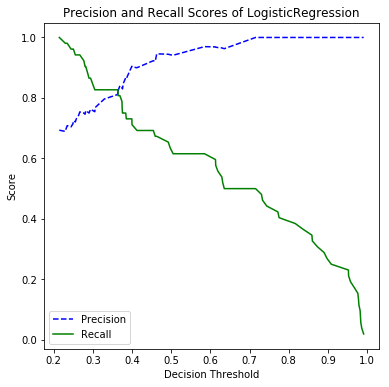

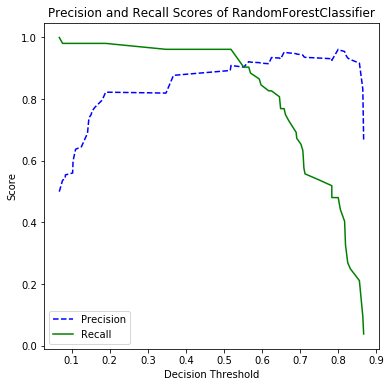

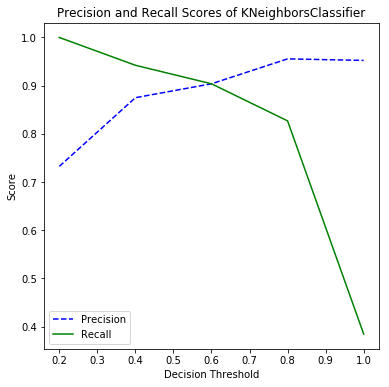

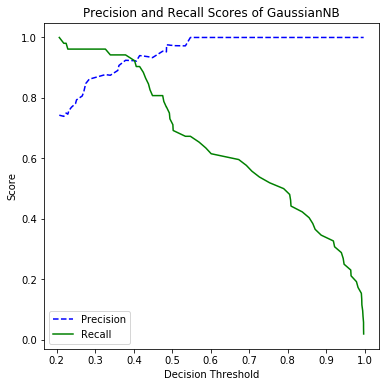

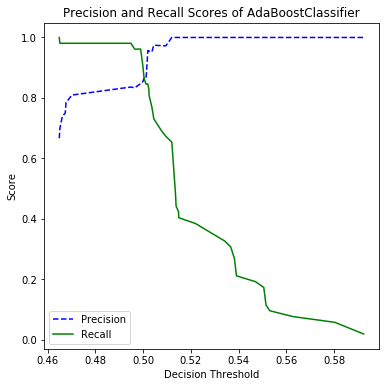

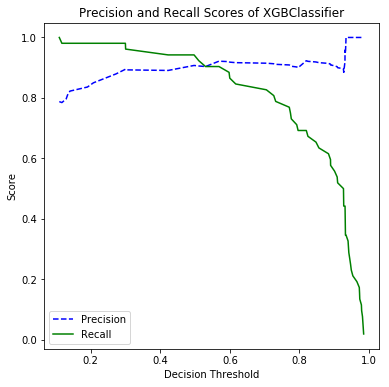

In [10]:
models.decision_threshold()

In [11]:
models.permutation_importance()

--------------------LogisticRegression--------------------


Weight,Feature
0.3675 ± 0.0598,Age
0.0854 ± 0.0320,EstimatedSalary
0 ± 0.0000,Male


--------------------SVC--------------------


Weight,Feature
0.2971 ± 0.0524,Age
0.1631 ± 0.0323,EstimatedSalary
-0.0039 ± 0.0090,Male


--------------------RandomForestClassifier--------------------


Weight,Feature
0.2869 ± 0.0503,Age
0.1208 ± 0.0165,EstimatedSalary
-0.0065 ± 0.0074,Male


--------------------KNeighborsClassifier--------------------


Weight,Feature
0.3063 ± 0.0509,Age
0.1866 ± 0.0411,EstimatedSalary
-0.0008 ± 0.0056,Male


--------------------GaussianNB--------------------


Weight,Feature
0.3409 ± 0.0611,Age
0.1298 ± 0.0243,EstimatedSalary
-0.0010 ± 0.0017,Male


--------------------AdaBoostClassifier--------------------


Weight,Feature
0.3153 ± 0.0527,Age
0.1266 ± 0.0211,EstimatedSalary
0.0016 ± 0.0075,Male


XGBClassifier is incompatible with eli5's PermutationImportance


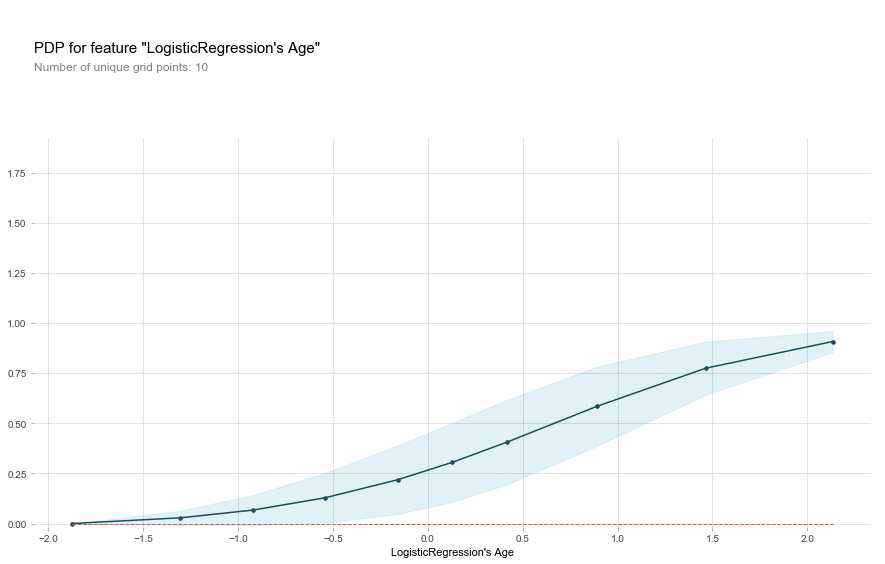

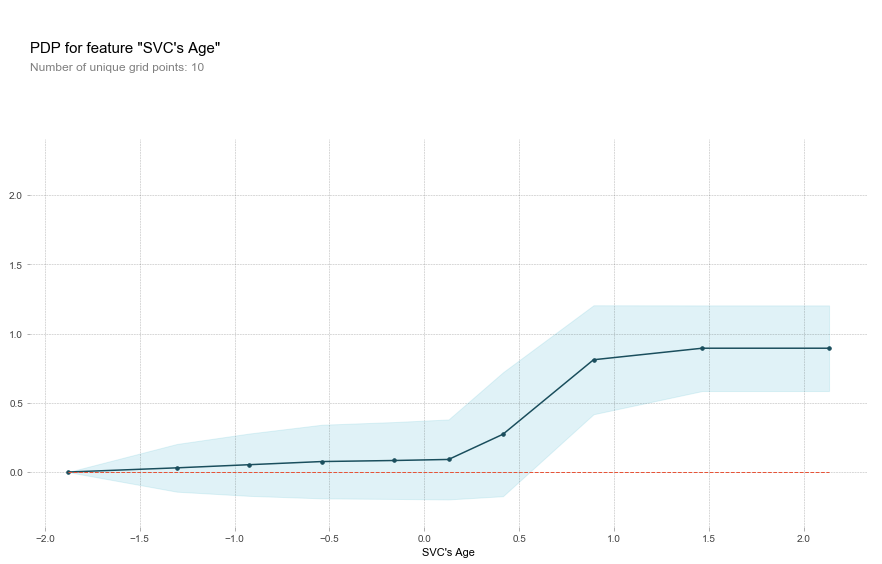

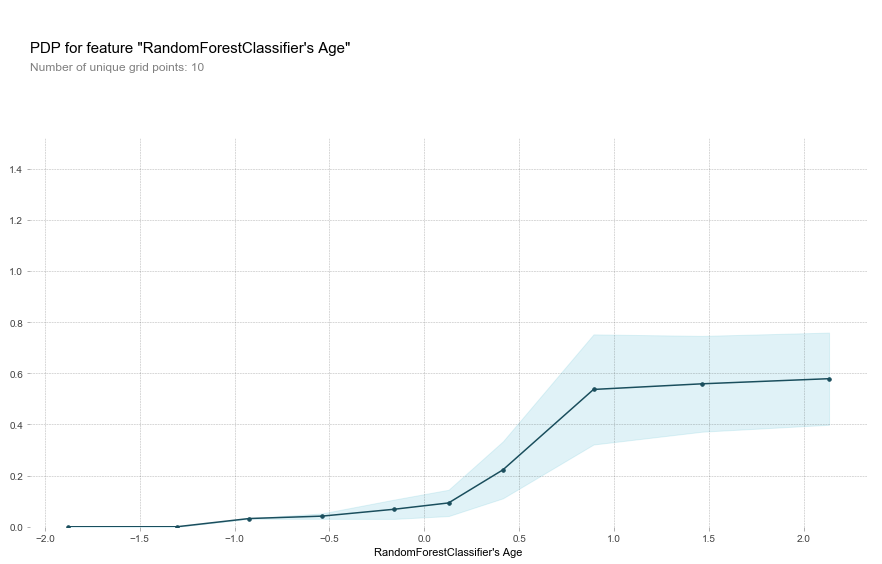

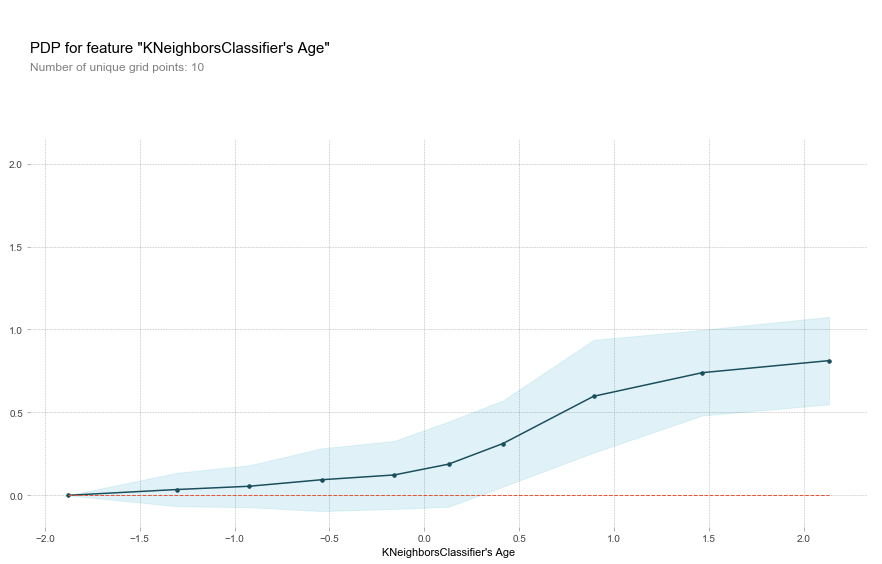

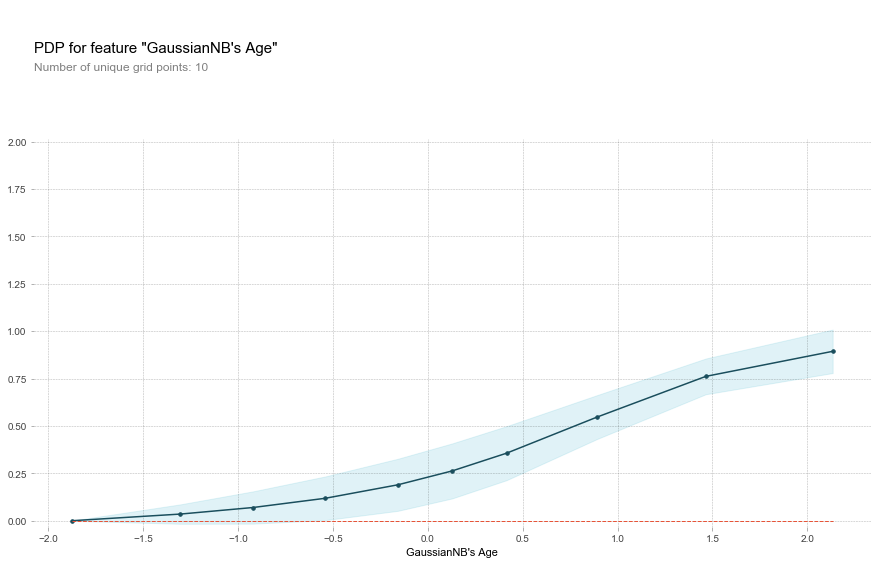

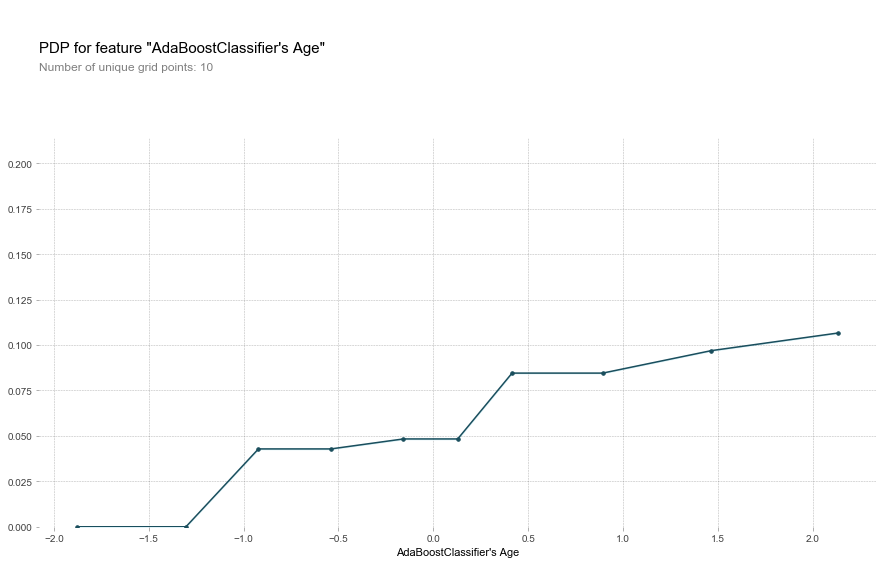

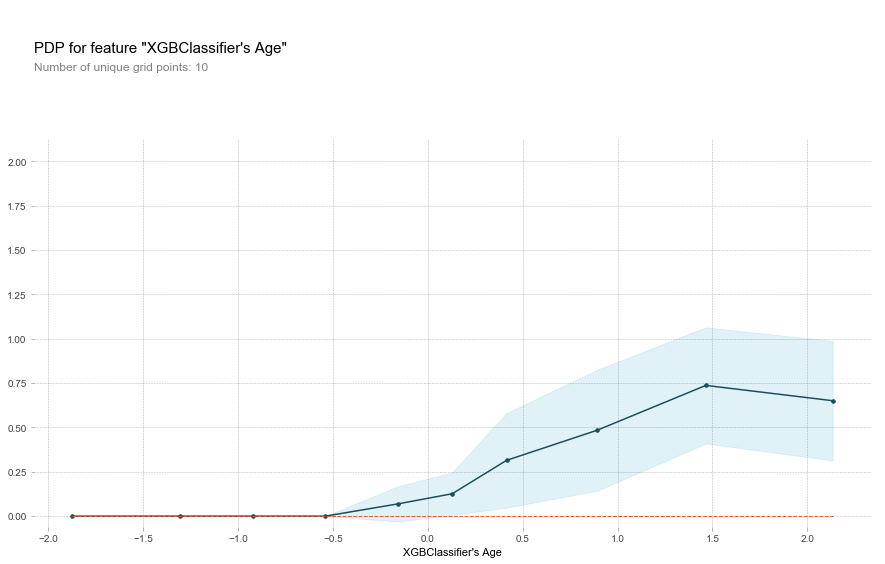

In [14]:
models.partial_dependence_plot("Age")